# Neural Aaditive model training

### Importing libraries

In [1]:
from nam.config import Configuration
from nam.model import NeuralAdditiveModel
from nam.dataset import AnalysisDataset
from nam.trainer import Trainer
from nam.visualization import load_model, partial_residual_plot

### Sample dataset  

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_data = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_data['target'] = housing.target

In [3]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Set configurations  

In [4]:
config = Configuration()
config.show()

---------------------------------------------------------------------------------------
Directory "./trained_model" was created for saving trained model and information.
---------------------------------------------------------------------------------------

output_dir:  ./trained_model
device:  cpu
first_layer:  ReLU
first_layer_size:  [512]
hidden_layer_size:  [64, 32]
batch_size:  1024
output_regularization:  1e-05
l2_regularization:  1e-06
lr:  0.01
gamma:  0.995
step_size:  1
num_epochs:  500
test_size:  0.2
validation_size:  0.1


### Create dataset

In [5]:
dataset = AnalysisDataset(config,
                          dataframe = housing_data,
                          feature_names = housing_data.columns[:-1],
                          target_name = housing_data.columns[-1])

### Create model

In [6]:
model = NeuralAdditiveModel(config,
                            num_in_features = len(dataset.feature_names), 
                            num_first_layer_unit = config.first_layer_size*len(dataset.feature_names), 
                            intercept = dataset.intercept)
model = model.to(config.device)

### Training loop

Start of training loop
Epoch 1/500
Epoch 100/500
Epoch 200/500
Epoch 300/500
Epoch 400/500
Epoch 500/500
The trained model was saved in "./trained_model"


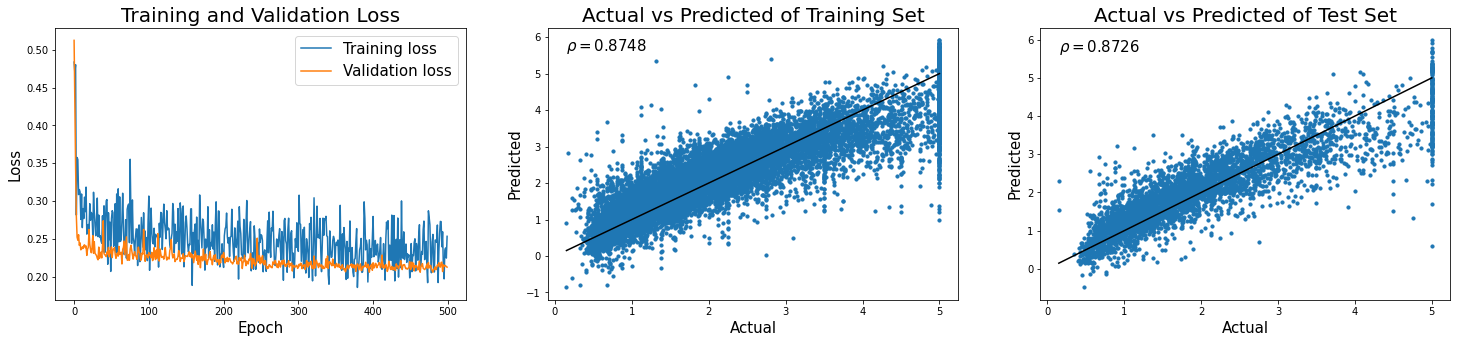

In [7]:
trainer = Trainer(config, model, dataset)
trainer.train()

### Model explanation

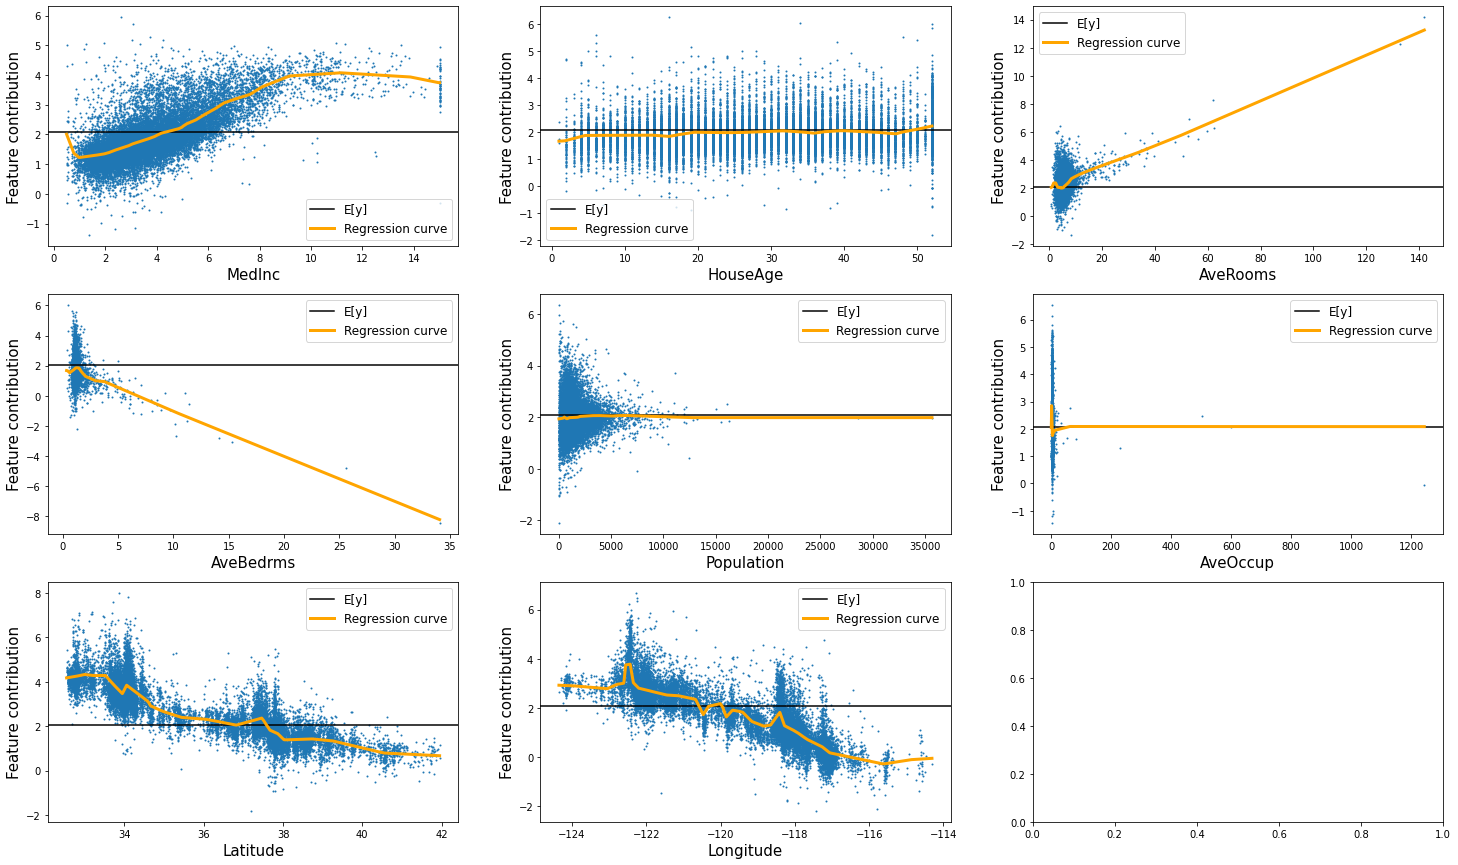

In [8]:
trained_model = load_model(config)
fig = partial_residual_plot(trained_model, dataset)

### Interaction

In [9]:
from nam.model import InteractionNN
from nam.trainer import InteractionTrainer

In [10]:
# Build model
interaction_model = InteractionNN(trained_model.num_in_features)
interaction_model = interaction_model.to(config.device)

Start of training loop
Epoch 1/500
Epoch 100/500
Epoch 200/500
Epoch 300/500
Epoch 400/500
Epoch 500/500
The trained model was saved in "./trained_model"


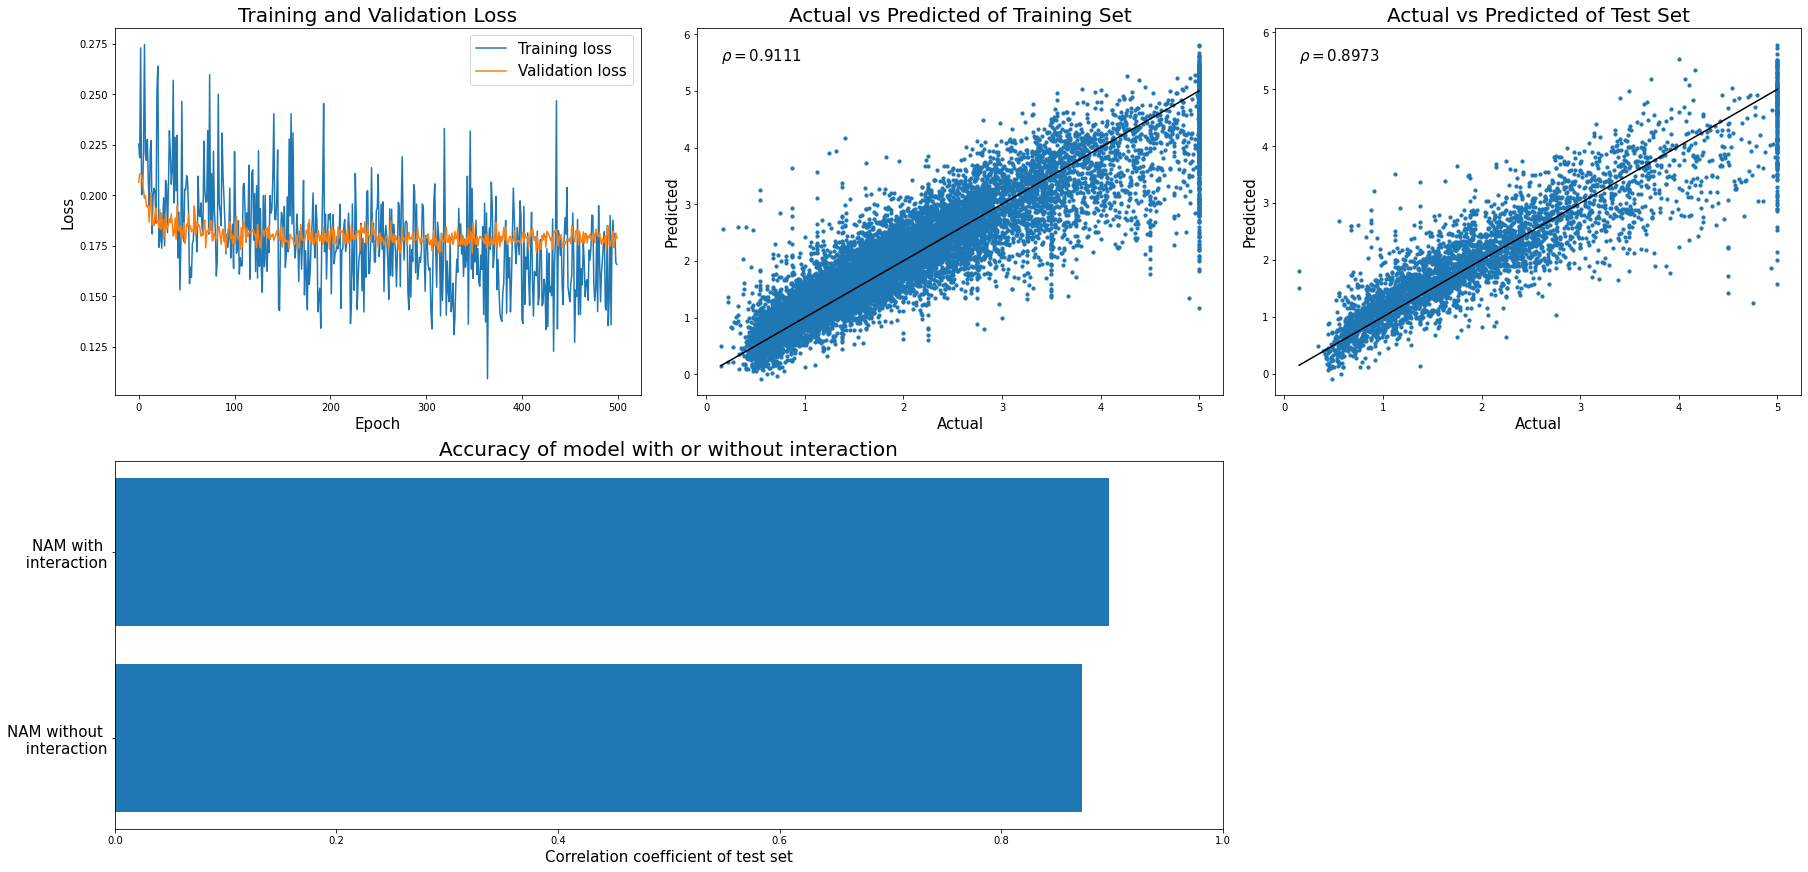

In [11]:
# Training
interaction_trainer = InteractionTrainer(config, trained_model, interaction_model, dataset)
interaction_trainer.train()